# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_pro_cus_merged.pkl'))

# Q2

In [4]:
df . head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,no._of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 9721097
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   days_since_last_order  float16 
 6   product_id             int32   
 7   add_to_cart_order      int32   
 8   reordered              int8    
 9   product_name           object  
 10  aisle_id               int8    
 11  department_id          int8    
 12  prices                 float16 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int8    
 19  loyalty_flag           object  
 20  average_price          float32 
 21  spending_flag          object  

First names and surnames should be removed in order to protect indiviuals identities

In [6]:
# Dropping first names and surnames
df=df.drop(columns = ['First Name','Surname'])

In [7]:
#checking columns
df . head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_last_orders,order_frequency_flag,Gender,STATE,Age,date_joined,no._of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,550135,1,7,1,9,20.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
df . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 9721097
Data columns (total 31 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   days_since_last_order  float16 
 6   product_id             int32   
 7   add_to_cart_order      int32   
 8   reordered              int8    
 9   product_name           object  
 10  aisle_id               int8    
 11  department_id          int8    
 12  prices                 float16 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int8    
 19  loyalty_flag           object  
 20  average_price          float32 
 21  spending_flag          object  

first names and surnames have been dropped

# Q3

In [9]:
# Creating regional segmentation of the data

In [10]:
# Creating an empty container
region=[]
# Creating a "region" column based on the "STATE" column
for value in df['STATE']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [11]:
df['region']=region

In [12]:
# Checking values
df['region'].value_counts(dropna=False)

South        3236318
West         2487728
Midwest      2280386
Northeast    1716666
Name: region, dtype: int64

In [13]:
#creating a crosstab between region and spending_flag
region_spend=pd.crosstab(df['region'],df['spending_flag'],dropna=False)

In [14]:
region_spend.to_clipboard()

In [15]:
region_spend

spending_flag,High spender,Low spender
region,,
Midwest,41942,2233577
Northeast,29397,1684255
South,56904,3173369
West,44220,2439631


# Q4

In [16]:
# creating a column (activity_of_customer) where less active customer has value less than 5.
df.loc[df['max_order']>=5,'activity_of_customer']='Highly active customer'
df.loc[df['max_order']<5,'activity_of_customer']='Less active customer'

In [17]:
df['activity_of_customer'].value_counts(dropna=False)

Highly active customer    9289401
Less active customer       431697
Name: activity_of_customer, dtype: int64

In [18]:
#creating a subset of highly active customer
df_high=df[df['activity_of_customer']=='Highly active customer']

In [19]:
#already exported in previous sessions

# Q5

In [20]:
# creating customer profiles

In [21]:
#creating age profile
df.loc[df['Age']>65,'age_flag']='Senior'
df.loc[(df['Age']<=65) & (df['Age']>40),'age_flag']='Middle-age'
df.loc[df['Age']<=40,'age_flag']='Young adult'

In [22]:
df['age_flag'].value_counts(dropna=False)

Middle-age     3792436
Young adult    3500675
Senior         2427987
Name: age_flag, dtype: int64

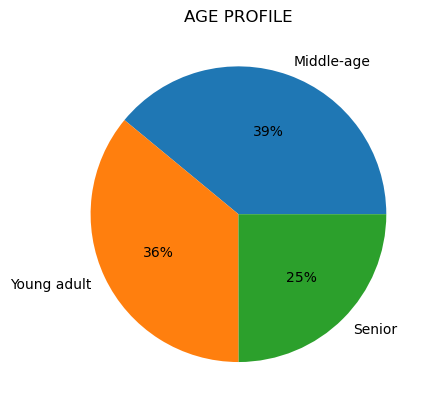

In [23]:
# creating visualisation to show age profiles in pie chart
age_profile=df['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

In [24]:
# exporting visualisation
age_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_profile.png'))

In [25]:
# age aggregations
age_sums=df.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum','max','mean']})

In [26]:
age_sums

days_since_last_order                  prices          
                              min   max       mean    sum  max mean
age_flag                                                           
Middle-age                    0.0  30.0  11.112347    NaN  inf  NaN
Senior                        0.0  30.0  11.080113    NaN  inf  NaN
Young adult                   0.0  30.0  11.105262    NaN  inf  NaN

In [27]:
# attempting to change inf values to Nan then not include null values in Price
# df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
# This didnt't work, it caused the laptop to freeze for half an hour until I could perform a Keyboard Interrupt

In [28]:
age_sums

days_since_last_order                  prices          
                              min   max       mean    sum  max mean
age_flag                                                           
Middle-age                    0.0  30.0  11.112347    NaN  inf  NaN
Senior                        0.0  30.0  11.080113    NaN  inf  NaN
Young adult                   0.0  30.0  11.105262    NaN  inf  NaN

In [29]:
df["prices"].value_counts()

12.296875    187021
10.296875    152829
4.000000     134443
6.300781     131846
1.299805     128056
              ...  
20.203125        33
22.703125        27
21.500000        21
21.000000         5
18.296875         1
Name: prices, Length: 242, dtype: int64

In [30]:
prices_list = df['prices'].tolist()

In [31]:
list(df['prices'])

[9.0,
 9.0,
 9.0,
 9.0,
 4.3984375,
 4.3984375,
 4.3984375,
 4.3984375,
 4.69921875,
 3.0,
 3.0,
 10.296875,
 4.0,
 4.0,
 8.6015625,
 8.6015625,
 8.6015625,
 13.3984375,
 13.3984375,
 1.7998046875,
 6.80078125,
 9.0,
 9.0,
 9.0,
 4.3984375,
 4.3984375,
 4.3984375,
 3.599609375,
 3.599609375,
 3.599609375,
 3.599609375,
 3.0,
 3.0,
 4.0,
 4.0,
 2.099609375,
 2.099609375,
 4.8984375,
 3.80078125,
 3.80078125,
 3.80078125,
 8.796875,
 3.30078125,
 3.30078125,
 9.0,
 9.1015625,
 14.0,
 7.6015625,
 9.1015625,
 11.3984375,
 11.3984375,
 1.900390625,
 8.6015625,
 5.69921875,
 2.0,
 3.69921875,
 8.1015625,
 4.0,
 5.30078125,
 5.30078125,
 12.0,
 6.8984375,
 1.2998046875,
 1.2998046875,
 1.7001953125,
 1.7001953125,
 5.3984375,
 5.3984375,
 5.69921875,
 5.69921875,
 5.69921875,
 5.69921875,
 2.900390625,
 3.0,
 3.0,
 5.30078125,
 8.0,
 3.599609375,
 3.599609375,
 6.0,
 11.5,
 8.203125,
 10.203125,
 7.5,
 7.5,
 2.19921875,
 13.3984375,
 8.5,
 5.3984375,
 1.900390625,
 5.69921875,
 10.296875,
 9.

In [32]:
age_sums

days_since_last_order                  prices          
                              min   max       mean    sum  max mean
age_flag                                                           
Middle-age                    0.0  30.0  11.112347    NaN  inf  NaN
Senior                        0.0  30.0  11.080113    NaN  inf  NaN
Young adult                   0.0  30.0  11.105262    NaN  inf  NaN

In [33]:
df['prices'].describe()

count    9.721098e+06
mean              NaN
std               NaN
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max               inf
Name: prices, dtype: float64

In [34]:
df["prices"] = df["prices"].fillna(0)

In [35]:
age_sums

days_since_last_order                  prices          
                              min   max       mean    sum  max mean
age_flag                                                           
Middle-age                    0.0  30.0  11.112347    NaN  inf  NaN
Senior                        0.0  30.0  11.080113    NaN  inf  NaN
Young adult                   0.0  30.0  11.105262    NaN  inf  NaN

In [36]:
m = df.loc[df['prices'] != np.inf, 'prices'].max()

In [37]:
df['prices'].replace(np.inf,m,inplace=True)

In [38]:
df['prices'].describe()

count    9.721098e+06
mean              NaN
std               NaN
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max      1.489600e+04
Name: prices, dtype: float64

In [39]:
age_sums

days_since_last_order                  prices          
                              min   max       mean    sum  max mean
age_flag                                                           
Middle-age                    0.0  30.0  11.112347    NaN  inf  NaN
Senior                        0.0  30.0  11.080113    NaN  inf  NaN
Young adult                   0.0  30.0  11.105262    NaN  inf  NaN

In [40]:
#attempt to make subset as this worked in exercise 4.8 when aggregating prices
df3 = df[:7000000]

In [41]:
# age aggregations in df3
age_sums2=df3.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum','max','mean']})

In [42]:
age_sums2

days_since_last_order                       prices           \
                              min   max       mean         sum      max   
age_flag                                                                  
Middle-age                    0.0  30.0  10.159634  26196036.0  14896.0   
Senior                        0.0  30.0  10.142292  15974764.0  14896.0   
Young adult                   0.0  30.0  10.163197  23798990.0  14896.0   

                       
                 mean  
age_flag               
Middle-age   9.588024  
Senior       9.182265  
Young adult  9.413796

This has worked

In [43]:
#attempt to make subset larger
df4 = df[:9000000]

In [44]:
# age aggregations in df4
age_sums3=df4.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum','max','mean']})

In [46]:
age_sums3

days_since_last_order                       prices           \
                              min   max       mean         sum      max   
age_flag                                                                  
Middle-age                    0.0  30.0  10.797796  35783440.0  14896.0   
Senior                        0.0  30.0  10.769009  22108142.0  14896.0   
Young adult                   0.0  30.0  10.790657  32493236.0  14896.0   

                        
                  mean  
age_flag                
Middle-age   10.195433  
Senior        9.849397  
Young adult  10.011383

This has also worked using a subset of 9 million entries as opposed to 9.7million. I will use this from now on. 

In [47]:
df4 . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000000 entries, 0 to 8999999
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   days_since_last_order  float16 
 6   product_id             int32   
 7   add_to_cart_order      int32   
 8   reordered              int8    
 9   product_name           object  
 10  aisle_id               int8    
 11  department_id          int8    
 12  prices                 float16 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int8    
 19  loyalty_flag           object  
 20  average_price          float32 
 21  spending_flag          object  

In [48]:
# creating a crosstab between region and age
region_age=pd.crosstab(df['region'],df['age_flag'],dropna=False)

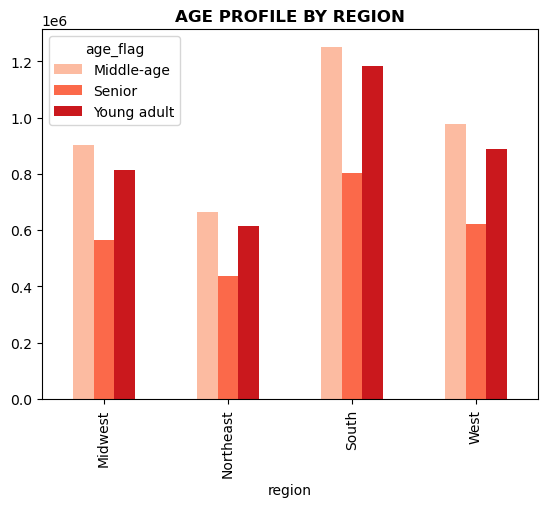

In [55]:
# creating bar chart between region and age
regions_age=region_age.plot.bar(color=sns.color_palette('Reds',3))
plt.title('AGE PROFILE BY REGION',fontweight='bold')
plt.show()

In [56]:
# exporting visualisation
regions_age.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','region_age.png'))

In [57]:
#importing departments dataframe
df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [58]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [60]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
df_dep . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [64]:
# changing data type of department_id in df_dep
df_dep['department_id']=df_dep['department_id'].astype('int8')

In [66]:
df_dep . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int8  
 1   department     21 non-null     object
dtypes: int8(1), object(1)
memory usage: 317.0+ bytes


In [67]:
#merging department data frame with df4 dataframe
df_final=df4.merge(df_dep,on='department_id')

In [68]:
# creating a crosstab between department and age
department_age=pd.crosstab(df_final['department'],df_final['age_flag'],dropna=False)

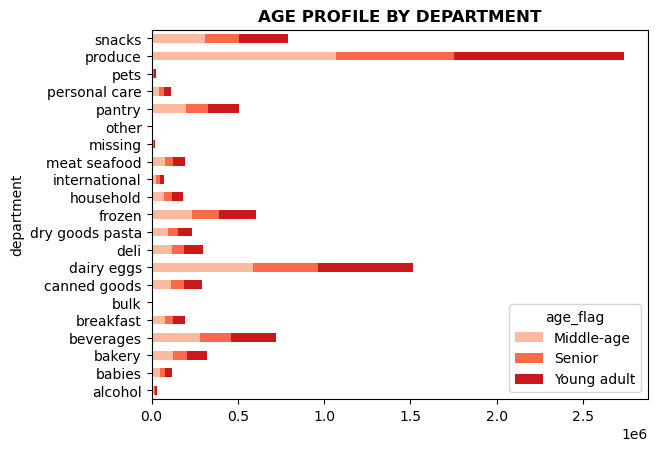

In [69]:
#creating a stacked bar chart of age and department
dept_age=department_age.plot.barh(stacked=True,color=sns.color_palette('Reds',3))
plt.title('AGE PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()

This shows that produce, dairy, and snacks are the most popular departments across all three age groups. 

In [70]:
# exporting visualisation
dept_age.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','department_age.png'))

In [72]:
# Creating income profile
df_final.loc[df_final['income']<=50000,'income_flag']='Low income'
df_final.loc[(df_final['income']>50000) & (df['income']<=100000),'income_flag']='Middle income'
df_final.loc[df_final['income']>100000,'income_flag']='High income'

In [73]:
df_final['income_flag'].value_counts(dropna=False)

High income      4144963
Middle income    2108471
NaN              1802335
Low income        944231
Name: income_flag, dtype: int64

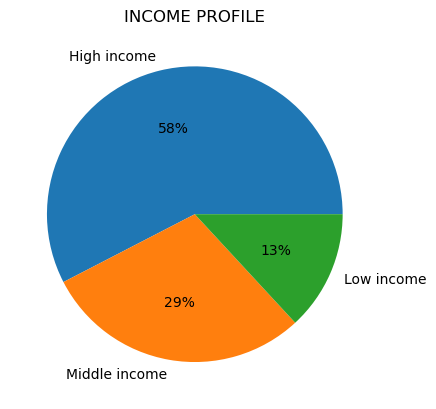

In [74]:
#creating visualisation to show income profiles in pie chart
income_profile=df_final['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='',autopct=('%1.f%%'))

In [75]:
# exporting visualisation
income_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','income_profile.png'))

In [76]:
# income aggregations
income_sums=df_final.groupby(['income_flag']).agg({'days_since_last_order':['max','mean'],'prices':['max','mean','sum']})

In [77]:
income_sums

days_since_last_order              prices                       
                                max       mean      max       mean         sum
income_flag                                                                   
High income                    30.0  10.764417  14896.0  12.560101  52061152.0
Low income                     30.0  11.053222     25.0   6.737716   6361960.5
Middle income                  30.0  10.751553  14896.0   8.262550  17421348.0

Instacart makes more income through high income individuals, then middle, and then finally low income individuals. 

In [78]:
#creating crosstab between income and region
income_region=pd.crosstab(df_final['region'],df_final['income_flag'],dropna=False)

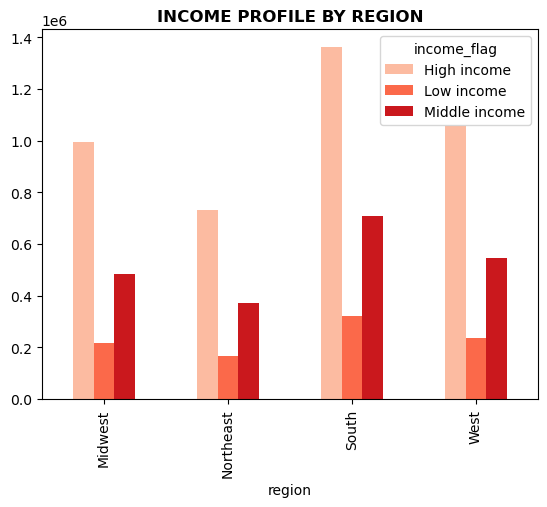

In [79]:
# creating visualisation to show relationship between income and region in a bar chart
income_regions=income_region.plot.bar(color=sns.color_palette('Reds',3))
plt.title('INCOME PROFILE BY REGION',fontweight='bold')
plt.show()

In [80]:
# exporting visualisation
income_regions.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','income_regions.png'))

In [81]:
# creating crosstab between income and department
department_income=pd.crosstab(df_final['department'],df_final['income_flag'],dropna=False)

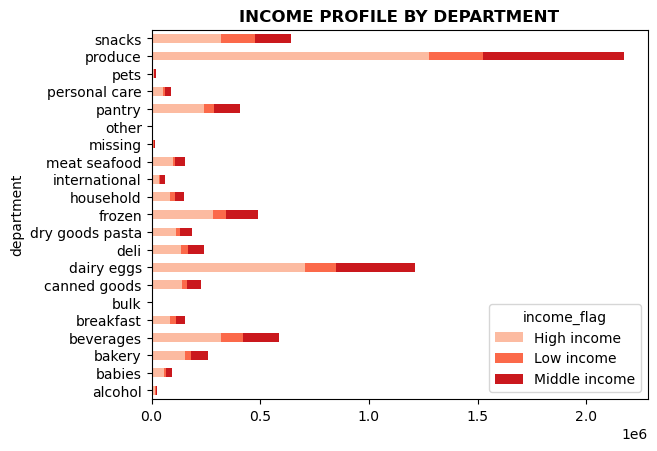

In [82]:
# creating visualisation to show income profile by department in a stacked bar chart
dept_income=department_income.plot.barh(stacked=True,color=sns.color_palette('Reds',3))
plt.title('INCOME PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()    

Again, produce, dairy, and snacks are the 3 leading departments

In [83]:
# exporting visualisation
dept_income.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','dependent_income.png'))

In [85]:
# creating number of dependants profile
df_final.loc[df_final['no._of_dependants']==0,'family_flag']='Single'
df_final.loc[df_final['no._of_dependants']!=0,'family_flag']='Family'

In [86]:
df_final['family_flag'].value_counts(dropna=False)

Family    6752523
Single    2247477
Name: family_flag, dtype: int64

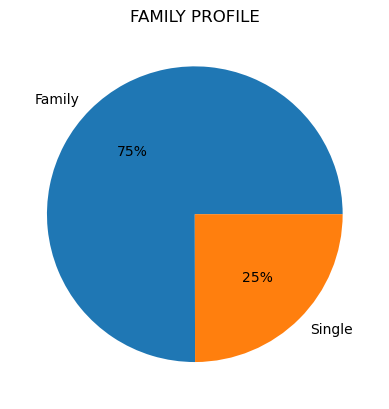

In [87]:
# creating pie chart to show family profiles
family_profile=df_final['family_flag'].value_counts().plot.pie(title='FAMILY PROFILE',label='',autopct=('%1.f%%'))

In [88]:
# exporting visualisation
family_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_profile.png'))

In [89]:
# family statistics
family_sums=df_final.groupby(['family_flag']).agg({'days_since_last_order':['max','mean'],'prices':['max','mean','sum']})

In [90]:
family_sums

days_since_last_order              prices                       
                              max       mean      max       mean         sum
family_flag                                                                 
Family                       30.0  10.793164  14896.0  10.115611  68305896.0
Single                       30.0  10.772654  14896.0   9.823870  22078922.0

75% of Instacart customers have family members, so are likely shopping for them too. These customers generate roughly 3 times as much income as single customers with no dependants

In [94]:
# creating a crosstab between dependants and region
region_dependant=pd.crosstab(df_final['region'],df_final['family_flag'],dropna=False)

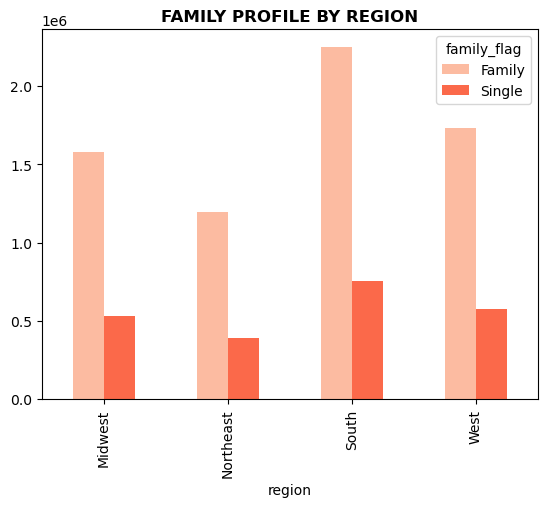

In [95]:
#creating bar chart
region_dependants=region_dependant.plot.bar(color=sns.color_palette('Reds',3))
plt.title('FAMILY PROFILE BY REGION',fontweight='bold')
plt.show()

In [96]:
# exporting visualisation
region_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','region_dependents.png'))

In [97]:
# Creating a crosstab between dependants and departments
family_and_dept=pd.crosstab(df_final['department'],df_final['family_flag'],dropna=False)

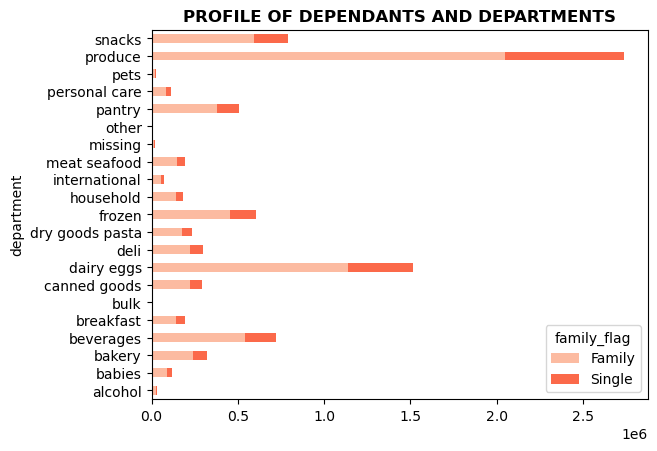

In [98]:
# Creating a stacked bar chart to show relationship between dependants and department
vis_stacked_bar_dependants_and_dept=family_and_dept.plot.barh(stacked=True,color=sns.color_palette('Reds',3))
plt.title('PROFILE OF DEPENDANTS AND DEPARTMENTS', fontweight='bold')
plt.show()

In [99]:
vis_stacked_bar_dependants_and_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','vis_stacked_bar_family_and_dept.png'))

In [102]:
# Creating a crosstab between department and region
dept_and_region=pd.crosstab(df_final['department'],df_final['region'],dropna=False)

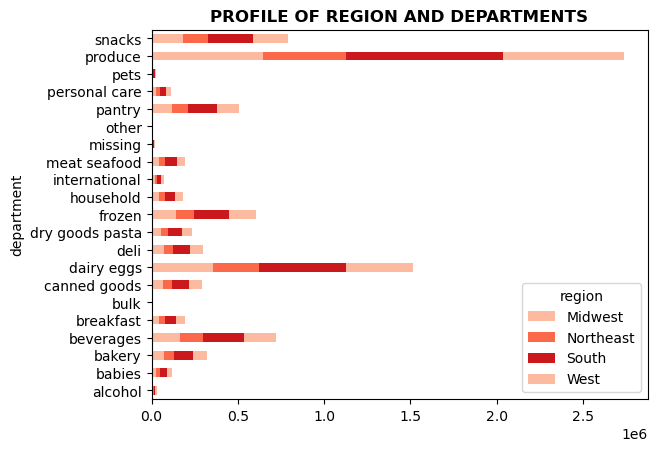

In [103]:
# Creating a stacked bar chart between region and department
vis_stacked_bar_region_and_dept=dept_and_region.plot.barh(stacked=True,color=sns.color_palette('Reds',3))
plt.title('PROFILE OF REGION AND DEPARTMENTS', fontweight='bold')
plt.show()

In [104]:
#exporting visualisation
vis_stacked_bar_region_and_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','vis_stacked_bar_region_and_dept.png'))

In [105]:
# Creating a crosstab between spending and region
spending_and_region=pd.crosstab(df_final['loyalty_flag'],df_final['region'],dropna=False)

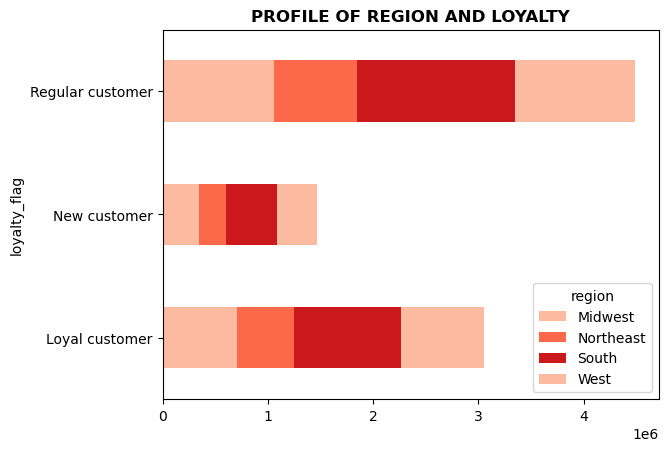

In [106]:
# Creating a stacked bar chart between spending and region
vis_stacked_bar_spending_and_region=spending_and_region.plot.barh(stacked=True,color=sns.color_palette('Reds',3))
plt.title('PROFILE OF REGION AND LOYALTY', fontweight='bold')
plt.show()

In [107]:
# exporting visualisation
vis_stacked_bar_spending_and_region.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','vis_stacked_bar_loyalty_and_region.png'))

# Exporting dataframe

In [108]:
# exporting dataframe
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_final.pkl'))